In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xlwt
%matplotlib inline

In [2]:
jd_consumer=pd.read_excel('./京东消费者分析数据.xlsx',sheet_name='JD_Fnl')

In [3]:
jd_consumer.head()

,customer_id,product_id,action_date,action_id,type,age_range,gender,customer_register_date,customer_level,city_level,brand,shop_id,category,product_market_date,vender_id,fans_number,vip_number,shop_register_date,shop_category,shop_score
0,976695,328360,2018-03-05 08:52:00,10633744,PageView,5.0,W,2017-06-17,6,3.0,LukFook,2959,Bracelet,2017-10-05,4322,1159,36596,2017-07-04,Jewellery Accessories,9.043610
1,395399,141632,2018-03-20 10:55:00,5472028,PageView,4.0,M,2018-01-21,6,5.0,illuma,4203,Milk Power,2015-06-12,3563,2411,65893,2013-08-08,Mother and Infant,9.537151
2,1068082,5924,2018-04-01 13:56:00,3853455,PageView,6.0,W,2012-08-13,1,4.0,Li-Ning,8002,Badminton,2013-06-14,1457,213610,357580,2013-05-23,Outdoor Sports,9.571139
3,1068082,10723,2018-04-01 13:45:00,3853455,PageView,6.0,W,2012-08-13,1,4.0,Li-Ning,8002,Badminton,2011-07-19,1457,213610,357580,2013-05-23,Outdoor Sports,9.571139
4,735392,4559,2018-02-06 20:25:00,9434940,PageView,6.0,M,2009-09-15,7,5.0,Other,6944,Cookie,2015-11-16,355,63969,85597,2014-10-31,Food,9.665680


In [120]:
jd_consumer.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183828 entries, 0 to 183827
Data columns (total 24 columns):
customer_id               183828 non-null int64
product_id                183828 non-null int64
action_time               183828 non-null datetime64[ns]
action_id                 183828 non-null int64
type                      183828 non-null object
age_range                 183745 non-null float64
gender                    183828 non-null object
customer_register_date    183828 non-null datetime64[ns]
customer_level            183828 non-null int64
city_level                183703 non-null float64
brand                     183828 non-null object
shop_id                   183828 non-null int64
category                  183828 non-null object
product_market_date       183828 non-null datetime64[ns]
vender_id                 183828 non-null int64
fans_number               183828 non-null int64
vip_number                183828 non-null int64
shop_register_date        112474 non-n

In [4]:
jd_consumer['action_date'].describe()

count                  183828
unique                  75858
top       2018-02-04 22:53:00
freq                       15
first     2018-02-01 00:00:00
last      2018-04-15 23:59:00
Name: action_date, dtype: object

该数据包含2018年2月1号到2018年4月15号的数据

| 用户基础数据                                                 | 用户行为数据                                                 | 产品数据                                                     | 商家数据                                                     |
| ------------------------------------------------------------ | ------------------------------------------------------------ | ------------------------------------------------------------ | ------------------------------------------------------------ |
| age_range  年龄分段<br/>gender  性别<br/>customer_registerdate  客户注册日期<br/>customer_level  会员等级<br/>city_level  会员城市等级 | action_date 行为时间<br/>action_id 行为编码<br/>type 行为类别 | product_id 产品编码<br/>brand 产品品牌<br/>product_market_date 产品上市时间<br/>category 产品类别 | shop_id 店铺编码<br/>vender_id 商家编码<br/>fans_number 粉丝数<br/>vip_number 会员数<br/>shop_register_dage开店时间<br/>shop_category 店铺主营<br/>shop_score店铺打分 |



# PART I

先对数据做一个整体的了解

### 用户基础数据

In [33]:
#对用户数据去重
jd_consumer_base=jd_consumer[['gender','customer_id','age_range','customer_register_date',
                                       'customer_level','city_level']].drop_duplicates()
#age_range、city_level字段有缺失值，两个都有100对个缺失值，为了方便，我这边暂时先把缺失值删除了
#当然做数据分析的时间不是所有的缺失值我们都要删除的，有时候需要实际情况对缺失值填充，这个是比较好的方法
#不是删除这么暴力了事，在本部分单变量分析中，我先删除，之后做多变量分析，或者机器学习的部分，再根据实际情况进行填充
#jd_consumer_base.dropna(inplace=True)

In [ ]:
jd_consumer.rename(columns={'action_date':'action_time'},inplace=True)

* 性别、年龄段，会员等级分布

In [34]:
#性别
gender_df=jd_consumer_base.gender.value_counts().reset_index(name='count')
gender_col=gender_df['index']

#年龄段
age_df=jd_consumer_base.age_range.value_counts().reset_index(name='count')
age_col=age_df['index']

#会员等级
customer_level_df=jd_consumer_base.customer_level.value_counts().reset_index(name='count')
customer_level_col=customer_level_df['index']

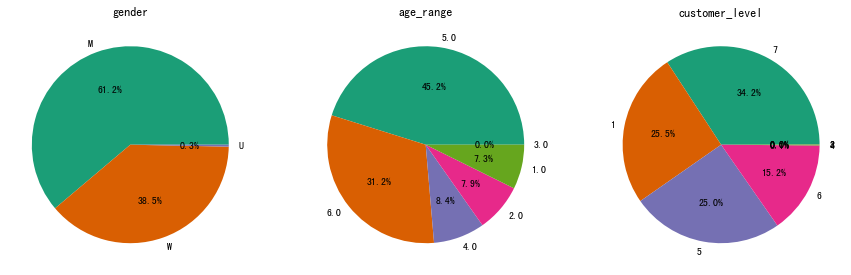

In [35]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
axes[0].pie(gender_df['count'],labels=gender_col,autopct = '%3.1f%%',colors=plt.cm.Dark2.colors)
axes[0].set_title('gender')
axes[1].pie(age_df['count'],labels=age_col,autopct = '%3.1f%%',colors=plt.cm.Dark2.colors)
axes[1].set_title('age_range')
axes[2].pie(customer_level_df['count'],labels=customer_level_col,autopct = '%3.1f%%',colors=plt.cm.Dark2.colors)
axes[2].set_title('customer_level');

平台上活跃用户男性占**61%**，女性占**38%**

年龄有6个分段，年龄分段在5和6的占大多数，总共占总体的**76%**

会员等级分为1~7级，7级的人数最多，1、5级也占有较多比重，仅次于7级的人数

* 城市

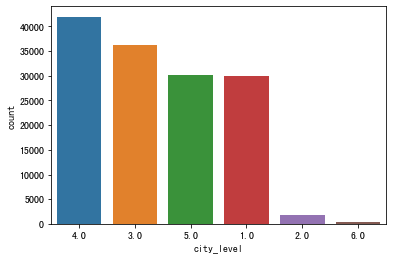

In [40]:
order=jd_consumer_base['city_level'].value_counts().index
sns.countplot(data=jd_consumer_base,x='city_level',order=order);

活跃人数主要集中在4、3、5、1等级的城市

### 商家基础数据

In [54]:
jd_shop=jd_consumer[['shop_id','vender_id','fans_number','vip_number',
                          'shop_register_date','shop_category','shop_score']].drop_duplicates()
#剔除异常值，只保留店铺评分大于0的数据
jd_shop=jd_shop[jd_shop['shop_score']>0]

* 前十大主营业务

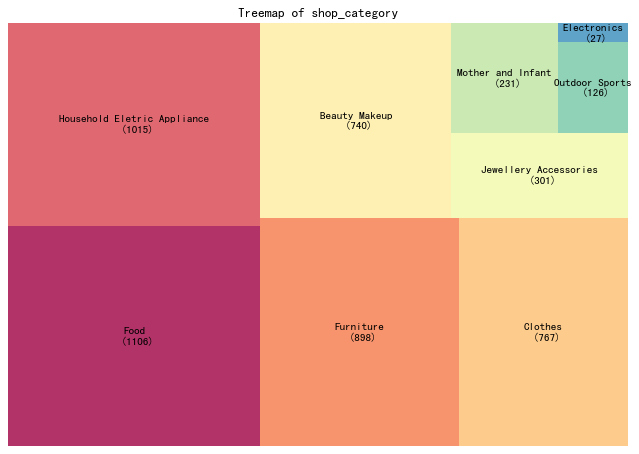

In [55]:
import squarify 

df = jd_shop.groupby('shop_category').size().reset_index(name='counts').sort_values(by='counts',ascending=False)
labels = df.apply(lambda x: str(x[0]) + "\n (" + str(x[1]) + ")", axis=1)
sizes = df['counts'].values.tolist()
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(10,7), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of shop_category')
plt.axis('off')
plt.show()

店铺主营种类共有9种，其中大多的店都主营食品、家用电器、家私、服饰、美妆

In [57]:
jd_shop['shop_category'].value_counts()

Food                           1106
Household Eletric Appliance    1015
Furniture                       898
Clothes                         767
Beauty Makeup                   740
Jewellery Accessories           301
Mother and Infant               231
Outdoor Sports                  126
Electronics                      27
Name: shop_category, dtype: int64

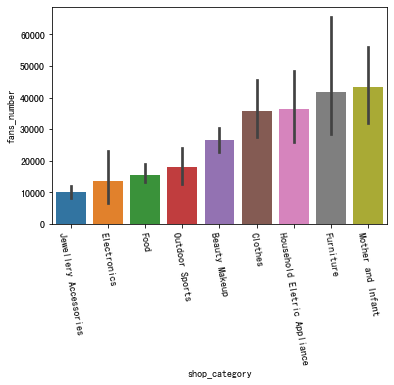

In [79]:
shop_order=jd_shop.groupby('shop_category')['fans_number'].mean().sort_values().index.tolist()
sns.barplot(x='shop_category',y='fans_number',data=jd_shop,order=shop_order)
plt.xticks(rotation=-80);

图中柱状图上的黑条，统计学上叫做置信区间，代表着95%的店铺所对应的粉丝数在黑条的区间范围内。

我们可以发现，主营母婴、家私、家用电子产品、服饰店铺的平均粉丝数都超过了3.5k，其中开母婴店的平均粉丝数最多。买这些东西，或许用户更偏向于自己信赖或者喜欢的店家

In [67]:
jd_shop.groupby('shop_category')['fans_number'].mean().sort_values()

shop_category
Jewellery Accessories          10198.803987
Electronics                    13586.703704
Food                           15579.532550
Outdoor Sports                 18121.952381
Beauty Makeup                  26484.836486
Clothes                        35846.930900
Household Eletric Appliance    36358.644335
Furniture                      41710.139198
Mother and Infant              43201.896104
Name: fans_number, dtype: float64

### 产品基础数据

In [80]:
jd_product=jd_consumer[jd_consumer['type'].isin(['PageView','Order'])]
jd_product_pv=jd_consumer[jd_consumer['type']=='PageView']
jd_product_order=jd_consumer[jd_consumer['type']=='Order']
jd_product.head()

,customer_id,product_id,action_date,action_id,type,age_range,gender,customer_register_date,customer_level,city_level,brand,shop_id,category,product_market_date,vender_id,fans_number,vip_number,shop_register_date,shop_category,shop_score
0,976695,328360,2018-03-05 08:52:00,10633744,PageView,5.0,W,2017-06-17,6,3.0,LukFook,2959,Bracelet,2017-10-05,4322,1159,36596,2017-07-04,Jewellery Accessories,9.043610
1,395399,141632,2018-03-20 10:55:00,5472028,PageView,4.0,M,2018-01-21,6,5.0,illuma,4203,Milk Power,2015-06-12,3563,2411,65893,2013-08-08,Mother and Infant,9.537151
2,1068082,5924,2018-04-01 13:56:00,3853455,PageView,6.0,W,2012-08-13,1,4.0,Li-Ning,8002,Badminton,2013-06-14,1457,213610,357580,2013-05-23,Outdoor Sports,9.571139
3,1068082,10723,2018-04-01 13:45:00,3853455,PageView,6.0,W,2012-08-13,1,4.0,Li-Ning,8002,Badminton,2011-07-19,1457,213610,357580,2013-05-23,Outdoor Sports,9.571139
4,735392,4559,2018-02-06 20:25:00,9434940,PageView,6.0,M,2009-09-15,7,5.0,Other,6944,Cookie,2015-11-16,355,63969,85597,2014-10-31,Food,9.665680


* 前十大被浏览最多的产品品牌、产品品类以及销量

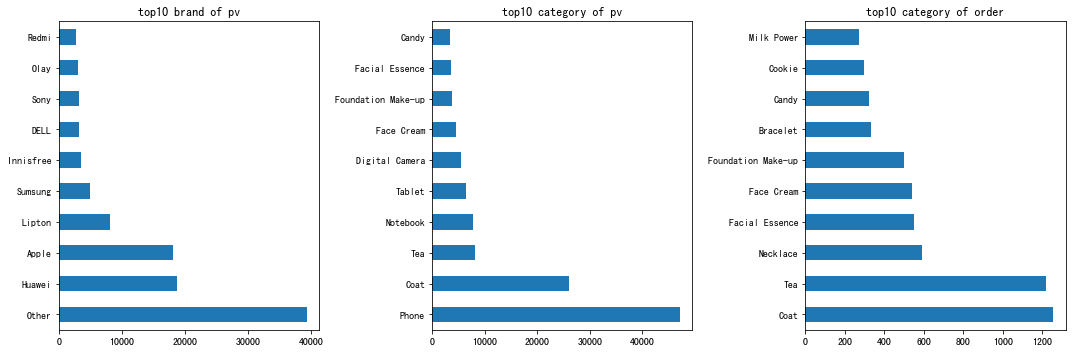

In [82]:
fig,axes=plt.subplots(1,3,figsize=(15,5))
jd_product_pv['brand'].value_counts()[:10].plot.barh(title='top10 brand of pv',ax=axes[0])
jd_product_pv['category'].value_counts()[:10].plot.barh(ax=axes[1],title='top10 category of pv')
jd_product_order['category'].value_counts()[:10].plot.barh(ax=axes[2],title='top10 category of order')
plt.tight_layout();

浏览占比最多的是不知名的品牌，其次是华为与苹果

浏览最多的产品是是手机和外套

被购买最多的是外套和茶，这个季节还是冬季，买外套和茶也合乎常理

### 用户行为数据

In [86]:
#对列重命名
jd_consumer.rename(columns={'action_date':'action_time'},inplace=True)
#提取时间中的小时时段
jd_consumer['action_hour']=jd_consumer['action_time'].apply(lambda x:pd.datetime.strftime(x,'%H'))
jd_consumer_behavior=jd_consumer[['action_hour','customer_id','type']].drop_duplicates()

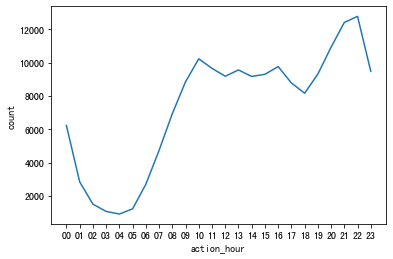

In [96]:
behavior_gb=jd_consumer_behavior.groupby('action_hour').size().reset_index(name='count')
sns.lineplot(x='action_hour',y='count',data=behavior_gb);

从下午6点开始，用户使用app的人数逐渐增多，一直到晚上10点达到顶峰。这也符合预期，人们在晚上有较多的空闲时间来支配。

# PART II

上面完成对基础数据的了解，现在需要对关键的运营指标做分析了，比如日活、月活，下单转化率等。

这些指标需要对比分析才能知道好坏，此份数据包含了18年2月份到18年4月15号的数据，我只拿出2月份与3月份的数据来做对比分析，看看其中的差异

* 用户月活跃量分析

In [98]:
#对时间数据做一些处理
jd_consumer['action_month']=jd_consumer['action_time'].apply(lambda x:pd.datetime.strftime(x,'%Y-%m'))
jd_consumer['action_day']=jd_consumer['action_time'].apply(lambda x:pd.datetime.strftime(x,'%d'))
jd_consumer['action_date']=jd_consumer['action_time'].apply(lambda x:pd.datetime.strftime(x,'%Y-%m-%d'))

In [99]:
#取2、3月份的数据
jd_consumer_2m3m=jd_consumer[jd_consumer['action_month']!='2018-04']

In [102]:
month_active=jd_consumer_2m3m[['customer_id','action_month']].drop_duplicates()
month_active['action_month'].value_counts().reset_index(name='count')

,index,count
0,2018-02,61932
1,2018-03,61559


从整体数据上看2018-3比2018/2的活跃用户环比下降了 **0.6%**，没有太大的波动

* 日活对比分析

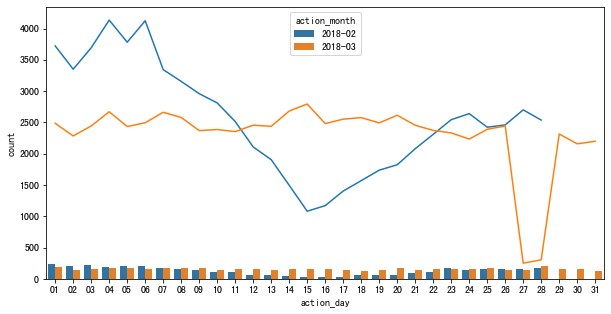

In [106]:
day_active=jd_consumer_2m3m[['customer_id','action_day','action_month','type']].drop_duplicates()
jd_consumer_2m=day_active[day_active['action_month']=='2018-02']
jd_consumer_3m=day_active[day_active['action_month']=='2018-03']
jd_consumer_2d=jd_consumer_2m['action_day'].value_counts().reset_index(
    name='count').sort_values(by='index',ascending=True)
jd_consumer_3d=jd_consumer_3m['action_day'].value_counts().reset_index(
    name='count').sort_values(by='index',ascending=True)

fig,ax=plt.subplots(1,1,figsize=(10,5))
sns.lineplot(x='index',y='count',data=jd_consumer_2d)
sns.lineplot(x='index',y='count',data=jd_consumer_3d)
sns.countplot(data=day_active[day_active['type']=='Order'],x='action_day',hue='action_month');
#ax.legend(labels=['2018-02','2018-03']);

上面的折线图是2、3月份的日活趋势对比图，下面的直方图表示2、3月份的日销量对比图，

2月份，活跃人数从6号开始一直下滑，直到除夕之夜之后有所反弹，回升至22号，趋于平稳，上下微幅波动。
结合直方图，可以看到2月份1号到7号是一个购物的小高峰期，也就是春节前10天左右，符合节假日前的消费行为情况，
可以推断销量的下降是受春节假期的影响。用户会提前抢购年货，避免节日快递高峰期等。

3月份，27号的日活出现断崖式下跌，直接影响了28号的日活，但奇怪的是27、28号的销量却没有出现太大的波动，和往日差不多。
对于这个奇怪的现象我们需要进一步的探索

* 18年3月份，27号日活骤降的原因分析

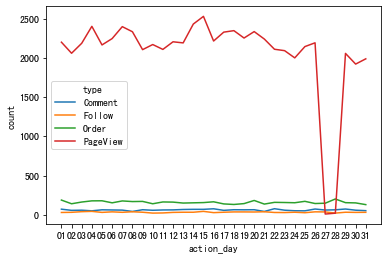

In [118]:
#用户的那些应为是下降的
type_3m=jd_consumer_3m.groupby(['action_day','type']).size().reset_index(name='count')
sns.lineplot(x='action_day',y='count',hue='type',data=a);

可以看出，除了用户的页面浏览人数骤降外，其它的行为是正常的，
大致可以判断，那天应该是这部分的数据采集除了问题，导致数据没有完全统计到，
当然这也需要跟数据采集的同事去确认才能100%确定。

* 下单转化率分析

2月份的下单转化率为5.4%，3月份的下单的转化率为7.6%，
3月份的下单的转化率比2月份提升了2%，是一个很大的提升。

虽然转化率有所提升，但原始数据缺少了购买金额，无法分析客单价，销售额等数据，所以也就无法判断销售情况

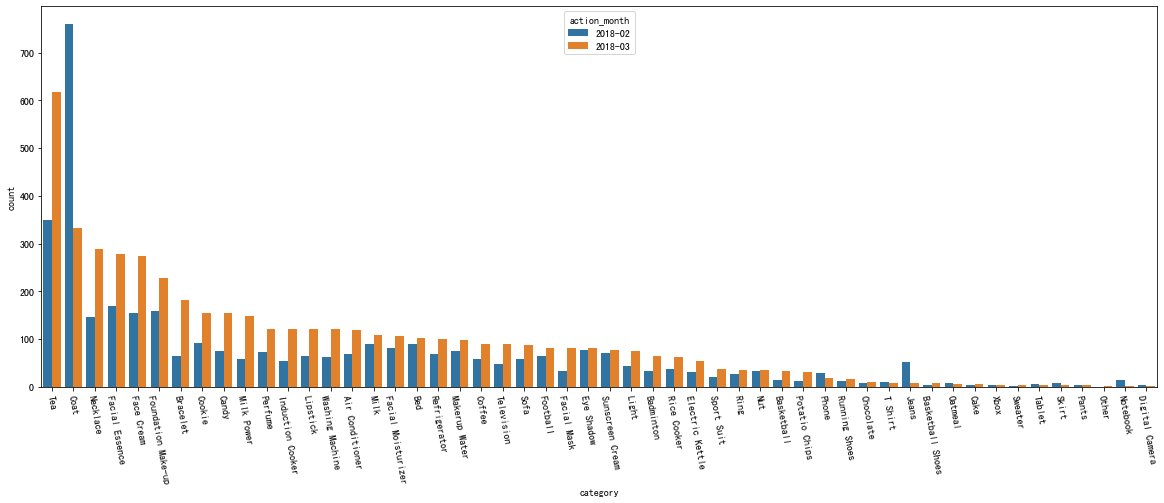

In [163]:
jd_consumer_order=jd_consumer_2m3m[jd_consumer_2m3m['type']=='Order']
#jd_consumer_order_2m=jd_consumer_order[jd_consumer_order['action_month']=='2018-02']
#order_2m=jd_consumer_order_2m['category'].value_counts().reset_index(name='2018-02')[:20]
jd_consumer_order_3m=jd_consumer_order[jd_consumer_order['action_month']=='2018-03']
order_3m=jd_consumer_order_3m['category'].value_counts().reset_index(name='2018-03')

fig,axes = plt.subplots(1,1,figsize=(20,7))
sns.countplot(data=jd_consumer_order,x='category',hue='action_month',order=order_3m['index'])
plt.xticks(rotation=-80);

图中可看出，2月份，除了外套、手机、牛仔裤、记事本的销量比3月份的多，其余的物品则是3月份的销量都高于2月份。
虽然3月份很多物品的销量都要高于2月份，但也不能肯定3月份的销售额就比2月份好，
如果外套、手机、牛仔裤的客单价很高的话，就能抬高2月份整体的销售额。

# 总结

通过探索数据分析，可以深入的感知用户基础数据、用户行为数据、产品数据、商家数据，这对后面的对比分析起到了一个非常大的帮助作用。
从这两个月的数据对比来看，运营的情况整体是朝着一个良性的方向缓缓发展的。

这样的分析只是在业务上做了一个解释，或者只是解释了一个已经发生的事情为什么会这样，但这样还远远不够，怎么样通过分析数据，然后反馈到业务去实现业务的增长呢？这是一个需要解决的核心问题